# 深度学习基础4_权重衰减(L2正则化)

In [2]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [3]:
# 初始化权重参数    
def init_params():
    w = torch.randn((num_inputs,1),requires_grad = True)
    b = torch.zeros(1,requires_grad = True)
    return [w,b]

# 定义L2范数
def l2_penalty(w):
    return (w**2).sum()/2

batch_size,num_epochs,lr = 1,100,0.003
net,loss = d2l.linreg,d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle = True)

def fit_and_plot(lambd):
    w,b = init_params()
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            # 添加L2范数惩罚项   
            l = loss(net(X,w,b),y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
                
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
            
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 14.04324722290039


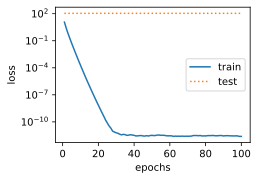

In [4]:
fit_and_plot(lambd=0)

L2 norm of w: 0.05787286162376404


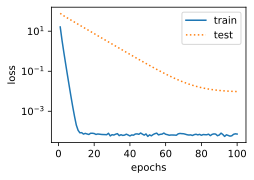

In [5]:
fit_and_plot(lambd=1)

L2 norm of w: 0.04469529911875725


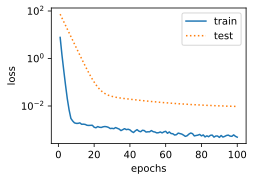

In [8]:
fit_and_plot(lambd=3)

## 权重衰减简洁实现

L2 norm of w: 13.638422966003418


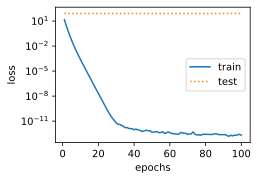

In [11]:
def fit_and_plot_pytorch(wd):
    # wd:权重衰减参数
    
    net = nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params = [net.weight],lr = lr,weight_decay = wd)
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # 不对偏差参数衰减

    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()

            l.backward()

            # 对两个optimizer实例分别调用step函数，从而分别更新权重和偏差
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

fit_and_plot_pytorch(0)


L2 norm of w: 0.06103188917040825


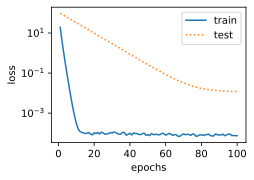

In [12]:
fit_and_plot_pytorch(1)

L2 norm of w: 0.03716159611940384


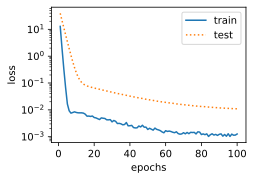

In [13]:
fit_and_plot_pytorch(5)